## M/M/1 Queue

[[0.4286099363274466, 27.92593138455029], [0.5831715844849082, 3.633831105370566], [0.7818958738012047, 4.138479728136909], [1.5361440156863193, 5.5024589691245245], [1.6804717405594265, 2.0051052918148775]]
Average Delay in Queue  26.7  Seconds
System utilization  99.02  %
Time Simulation Ended  43.63  Seconds


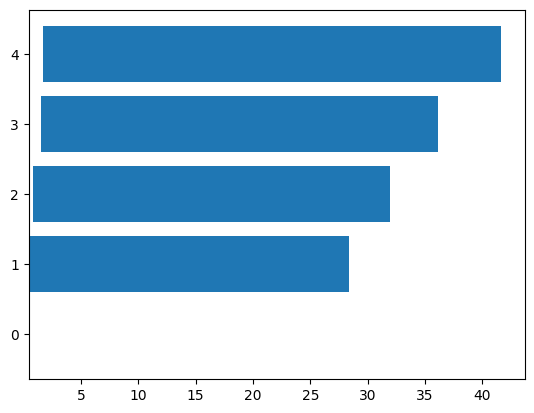

In [4]:
import random
import numpy as np
import matplotlib.pyplot as plt


# code added

def MM1(maximum_number_of_customers, mean_arrival_time, mean_service_time):
    customer = []
    wait_time = []
    system_idle_time = 0
    time = 0.0
    number_of_process = maximum_number_of_customers

    for i in range(number_of_process):
        arrival = np.random.exponential(1 / mean_arrival_time) * 60
        service = np.random.exponential(1 / mean_service_time) * 60
        data = [arrival, service]
        customer.append(data)

    customer.sort(key=lambda x: x[0])
    print(customer)

    for i in range(number_of_process):

        if time < customer[i][0]:  # System delay calculate kore nilam
            system_idle_time += abs(time - customer[i][0])
            time = customer[i][0]

        if time > customer[i][0]: # Wait time calculation
            wait_time.append(abs(time - customer[i][0]))
        else:
            wait_time.append(0)

        time = time + customer[i][1]

    average_wait = sum(wait_time) / number_of_process
    print("Average Delay in Queue ", round(average_wait, 2), " Seconds")
    average_sytem_idle = ((time - system_idle_time) / time) * 100
    print("System utilization ", round(average_sytem_idle, 2), " %")
    print("Time Simulation Ended ", round(time, 2), " Seconds")

    plt.barh(y=[i for i in range(number_of_process)], width=wait_time, left=[i[0] for i in customer])
    plt.show()


MM1(5, 53.33, 17.5)


## Single-Server Queueing System  

Here, we have taken  

Mean interarrival time   = 1.000 minutes  
Mean service time        = 0.500 minutes  
Number of customers      = 1000

In [5]:
import math

# Define constant values for the simulation
Q_LIMIT = 100  # Maximum number of customers allowed in the queue
BUSY = 1       # Represents that the server is busy serving a customer
IDLE = 0       # Represents that the server is idle and available for service

# Initialize variables for the simulation
next_event_type, num_custs_delayed, num_delays_required, num_events, num_in_q, server_status = 0, 0, 0, 2, 0, IDLE
area_num_in_q, area_server_status, mean_interarrival, mean_service, sim_time, total_of_delays = 0.0, 0.0, 0.0, 0.0, 0.0, 0.0
time_arrival = [0.0] * (Q_LIMIT + 1)  # Array to store arrival times of customers in the queue
time_last_event, time_next_event = 0.0, [0.0] * 3  # Variables to store the last and next event times


# Constants for random number generation
MODLUS = 2147483647
MULT1 = 24112
MULT2 = 26143
# List of random number generator seeds
zrng = [1, 1973272912, 281629770, 20006270, 1280689831, 2096730329, 1933576050,
        913566091, 246780520, 1363774876, 604901985, 1511192140, 1259851944,
        824064364, 150493284, 242708531, 75253171, 1964472944, 1202299975,
        233217322, 1911216000, 726370533, 403498145, 993232223, 1103205531,
        762430696, 1922803170, 1385516923, 76271663, 413682397, 726466604,
        336157058, 1432650381, 1120463904, 595778810, 877722890, 1046574445,
        68911991, 2088367019, 748545416, 622401386, 2122378830, 640690903,
        1774806513, 2132545692, 2079249579, 78130110, 852776735, 1187867272,
        1351423507, 1645973084, 1997049139, 922510944, 2045512870, 898585771,
        243649545, 1004818771, 773686062, 403188473, 372279877, 1901633463,
        498067494, 2087759558, 493157915, 597104727, 1530940798, 1814496276,
        536444882, 1663153658, 855503735, 67784357, 1432404475, 619691088,
        119025595, 880802310, 176192644, 1116780070, 277854671, 1366580350,
        1142483975, 2026948561, 1053920743, 786262391, 1792203830, 1494667770,
        1923011392, 1433700034, 1244184613, 1147297105, 539712780, 1545929719,
        190641742, 1645390429, 264907697, 620389253, 1502074852, 927711160,
        364849192, 2049576050, 638580085, 547070247]


# Random number generation function (lcgrand) is a random number generator 
# that generates uniform random numbers between 0 and 1.
# It is based on a linear congruential generator and uses a list of seeds (zrng) to generate random numbers.
def lcgrand(stream):
    global zrng
    zi, lowprd, hi31 = zrng[stream], 0, 0
    lowprd = (zi & 65535) * MULT1
    hi31 = (zi >> 16) * MULT1 + (lowprd >> 16)
    zi = ((lowprd & 65535) - MODLUS) + ((hi31 & 32767) << 16) + (hi31 >> 15)
    if zi < 0:
        zi += MODLUS
    lowprd = (zi & 65535) * MULT2
    hi31 = (zi >> 16) * MULT2 + (lowprd >> 16)
    zi = ((lowprd & 65535) - MODLUS) + ((hi31 & 32767) << 16) + (hi31 >> 15)
    if zi < 0:
        zi += MODLUS
    zrng[stream] = zi
    return (zi >> 7 | 1) / 16777216.0


# Random seed setting function (lcgrandst) sets the seed (zset) for a specific stream of the random number generator.
# It changes the value of a seed in the zrng list, which will affect the sequence of random numbers generated.
def lcgrandst(zset, stream):
    global zrng
    zrng[stream] = zset


# Random number getter function (lcgrandgt) retrieves the current seed value for a specific stream of the random number generator.
def lcgrandgt(stream):
    global zrng
    return zrng[stream]



# The expon function generates exponentially distributed random numbers using the inverse transform method.
# It calls the lcgrand function to get a uniform random number and then transforms it to an exponential distribution.
def expon(mean):
    return -mean * math.log(lcgrand(1))


# Function to initialize the simulation variables
def initialize():
    global sim_time, server_status, num_in_q, time_last_event, num_custs_delayed, total_of_delays, area_num_in_q, area_server_status, time_next_event
    global time_last_event  # Add global declaration for time_last_event

    # Initialize simulation time, server status, queue length, last event time, number of delayed customers, total delays, area for queue length, and area for server status
    sim_time = 0.0
    server_status = IDLE
    num_in_q = 0
    time_last_event = 0.0
    num_custs_delayed = 0
    total_of_delays = 0.0
    area_num_in_q = 0.0
    area_server_status = 0.0

    # Schedule the first arrival event and set the departure event time to a large value (effectively, no departure event yet)
    time_next_event[1] = sim_time + expon(mean_interarrival)
    time_next_event[2] = 1.0e+30

# Function to determine the next event and update simulation time
def timing():
    global next_event_type, sim_time
    min_time_next_event = 1.0e+29
    next_event_type = 0

    # Find the minimum time for the next event and identify the type of that event
    for i in range(1, num_events + 1):
        if time_next_event[i] < min_time_next_event:
            min_time_next_event = time_next_event[i]
            next_event_type = i

    # If no event is scheduled, terminate the simulation
    if next_event_type == 0:
        print("\nEvent list empty at time", sim_time)
        exit(1)

    # Update the simulation time to the time of the next event
    sim_time = min_time_next_event

# Function to handle the arrival of a customer
def arrive():
    global num_in_q, server_status, num_custs_delayed, total_of_delays
    delay = 0.0

    # Schedule the next arrival event
    time_next_event[1] = sim_time + expon(mean_interarrival)

    # If the server is busy, the arriving customer joins the queue
    if server_status == BUSY:
        num_in_q += 1
        # Check if the queue length exceeds the limit
        if num_in_q > Q_LIMIT:
            print("\nOverflow of the array time_arrival at time", sim_time)
            exit(2)
        # Store the arrival time of the customer in the queue
        time_arrival[num_in_q] = sim_time
    else:
        # If the server is idle, the arriving customer starts service immediately
        delay = 0.0
        total_of_delays += delay
        num_custs_delayed += 1
        server_status = BUSY
        # Schedule the departure event for the current customer
        time_next_event[2] = sim_time + expon(mean_service)

# Function to handle the departure of a customer
def depart():
    global num_in_q, server_status, num_custs_delayed, total_of_delays
    delay = 0.0

    # If there are no customers in the queue, the server becomes idle and no departure event is scheduled
    if num_in_q == 0:
        server_status = IDLE
        time_next_event[2] = 1.0e+30
    else:
        # If there are customers in the queue, the first customer departs
        num_in_q -= 1
        # Calculate the delay experienced by the departing customer and update the total delays
        delay = sim_time - time_arrival[1]
        total_of_delays += delay
        num_custs_delayed += 1
        # Schedule the departure event for the next customer in the queue
        time_next_event[2] = sim_time + expon(mean_service)
        # Move the remaining customers' arrival times in the queue one position forward
        for i in range(1, num_in_q + 1):
            time_arrival[i] = time_arrival[i + 1]

# Function to generate the simulation report
def report():
    global area_num_in_q, area_server_status, num_custs_delayed, sim_time

    print("\n\nSingle-server queueing system\n")
    print("Mean interarrival time{:11.3f} minutes".format(mean_interarrival))
    print("Mean service time{:16.3f} minutes".format(mean_service))
    print("Number of customers{:14d}".format(num_delays_required))

    # Calculate and print the average delay in the queue if there are delayed customers
    if num_custs_delayed > 0:
        print("\n\nAverage delay in queue{:11.3f} minutes".format(total_of_delays / num_custs_delayed))
    else:
        print("\n\nAverage delay in queue: N/A (No customers have been delayed)")

    # Calculate and print the average number of customers in the queue and server utilization
    if sim_time > 0:
        print("Average number in queue{:10.3f}".format(area_num_in_q / sim_time))
        print("Server utilization{:15.3f}".format(area_server_status / sim_time))
        print("Time simulation ended{:15.3f} minutes".format(sim_time))
    else:
        # If simulation has not started, print N/A for average number in queue, server utilization, and simulation end time
        print("Average number in queue: N/A (Simulation has not started)")
        print("Server utilization: N/A (Simulation has not started)")
        print("Time simulation ended: N/A (Simulation has not started)")

# Function to update time-average statistics during the simulation
def update_time_avg_stats():
    global area_num_in_q, area_server_status, time_last_event  # Add global declaration for time_last_event
    time_since_last_event = sim_time - time_last_event
    time_last_event = sim_time
    # Update the area for the number of customers in the queue and the server status based on the time since the last event
    area_num_in_q += num_in_q * time_since_last_event
    area_server_status += server_status * time_since_last_event

# Main function to run the simulation
def main():
    global num_custs_delayed, outfile

    # Input parameters (You can change these values as desired)
    global mean_interarrival, mean_service, num_delays_required
    mean_interarrival = 1.0     # 5.0
    mean_service = 0.5      # 2.0
    num_delays_required = 1000

    # Initialize the simulation
    initialize()

    # Run the simulation while more delays are still needed
    while num_custs_delayed < num_delays_required:
        timing()
        update_time_avg_stats()
        # Process the next event based on its type
        if next_event_type == 1:
            arrive()
        elif next_event_type == 2:
            depart()

    # Generate the report and close the output file (if any)
    report()

if __name__ == "__main__":
    main()
    # Start the simulation by calling the main function when the script is executed as the main program.




Single-server queueing system

Mean interarrival time      1.000 minutes
Mean service time           0.500 minutes
Number of customers          1000


Average delay in queue      0.430 minutes
Average number in queue     0.418
Server utilization          0.460
Time simulation ended       1027.915 minutes


## An Inventory System  

Here, we have taken  

Initial inventory level                 : 60 times  
Number of demand sizes                  : 4  
Distribution function of demand sizes   : 0.167 0.500 0.833 1.000  
Mean inter demand time                  : 0.10 months  
Delivary lag range                      : 0.50 to 1.00 months  
Length of simulation                    : 120 months  
Setup cost (K)                          : 32.0  
Incremental cost (i)                    : 3.0  
Holding cost (h)                        : 1.0  
Shortest cost (pi)                      : 5.0  

In [6]:
import random
import math
from tabulate import tabulate

# Embedded input data
input_data = """
60 120 9 4 0.10 32 3.0 1.0 5.0 0.5 1
0.167 0.500 0.833 1.000
20 40
20 60
20 80
20 100
40 60
40 80
40 100
60 80
60 100
"""

# External definitions for inventory system.
initial_inv_level = 0
num_months = 0
num_policies = 0
num_values_demand = 0
mean_interdemand = 0.0
setup_cost = 0.0
incremental_cost = 0.0
holding_cost = 0.0
shortage_cost = 0.0
minlag = 0.0
maxlag = 0.0
prob_distrib_demand = [0.0] * 26
smalls = 0
bigs = 0
amount = 0
inv_level = 0
next_event_type = 0
num_events = 0
area_holding = 0.0
area_shortage = 0.0
total_ordering_cost = 0.0
sim_time = 0.0
time_last_event = 0.0
time_next_event = [0.0] * 5

# Function to read input parameters from embedded data
def read_input():
    global initial_inv_level, num_months, num_policies, num_values_demand, mean_interdemand, setup_cost, incremental_cost, holding_cost, shortage_cost, minlag, maxlag, prob_distrib_demand
    lines = input_data.strip().split('\n')
    initial_inv_level, num_months, num_policies, num_values_demand, mean_interdemand, setup_cost, incremental_cost, holding_cost, shortage_cost, minlag, maxlag = map(float, lines[0].split())
    num_values_demand = int(num_values_demand)  # Ensure num_values_demand is an integer
    prob_distrib_demand[1:num_values_demand+1] = list(map(float, lines[1].split()))

# Function to initialize the simulation
def initialize():
    global sim_time, inv_level, time_last_event, total_ordering_cost, area_holding, area_shortage, time_next_event, next_event_type
    sim_time = 0.0
    inv_level = initial_inv_level
    time_last_event = 0.0
    total_ordering_cost = 0.0
    area_holding = 0.0
    area_shortage = 0.0
    time_next_event[1] = 1.0e+30
    time_next_event[2] = sim_time + expon(mean_interdemand)
    time_next_event[3] = num_months
    time_next_event[4] = 0.0
    next_event_type = 0

# Function to handle order arrival event
def order_arrival():
    global inv_level, time_next_event
    inv_level += amount
    time_next_event[1] = 1.0e+30

# Function to handle demand event
def demand():
    global inv_level, time_next_event
    inv_level -= random_integer(prob_distrib_demand)
    time_next_event[2] = sim_time + expon(mean_interdemand)

# Function to handle inventory evaluation event
def evaluate():
    global amount, total_ordering_cost, time_next_event
    if inv_level < smalls:
        amount = bigs - inv_level
        total_ordering_cost += setup_cost + incremental_cost * amount
        time_next_event[1] = sim_time + uniform(minlag, maxlag)
    time_next_event[4] = sim_time + 1.0

# Function to generate a report
def report():
    avg_ordering_cost = total_ordering_cost / num_months
    avg_holding_cost = holding_cost * area_holding / num_months
    avg_shortage_cost = shortage_cost * area_shortage / num_months
    total_cost = avg_ordering_cost + avg_holding_cost + avg_shortage_cost
    return [smalls, bigs, total_cost, avg_ordering_cost, avg_holding_cost, avg_shortage_cost]

# Function to update time-averaged statistics
def update_time_avg_stats():
    global area_holding, area_shortage, time_last_event
    time_since_last_event = sim_time - time_last_event
    time_last_event = sim_time
    if inv_level < 0:
        area_shortage -= inv_level * time_since_last_event
    elif inv_level > 0:
        area_holding += inv_level * time_since_last_event

# Function to generate a random integer based on probability distribution
def random_integer(prob_distrib):
    u = random.random()
    for i in range(1, len(prob_distrib)):
        if u < prob_distrib[i]:
            return i
    return len(prob_distrib) - 1

# Function to generate a uniform random variate
def uniform(a, b):
    return a + random.random() * (b - a)

# Function to generate an exponential random variate
def expon(mean):
    return -mean * math.log(random.random())

# Function to determine the next event
def timing():
    global next_event_type, sim_time, time_next_event
    min_time_next_event = 1.0e+29
    next_event_type = 0
    for i in range(1, num_events + 1):
        if time_next_event[i] < min_time_next_event:
            min_time_next_event = time_next_event[i]
            next_event_type = i
    if next_event_type == 0:
        raise Exception(f"Event list empty at time {sim_time}")
    sim_time = min_time_next_event

# Main function
def main():
    global num_policies, num_events, smalls, bigs
    read_input()
    num_events = 4
    results = []

    print("Single-product inventory system\n")
    print(f"Initial inventory level{int(initial_inv_level):24d} items\n")
    print(f"Number of demand sizes{int(num_values_demand):25d}\n")
    print("Distribution function of demand sizes ", end="")
    for i in range(1, num_values_demand + 1):
        print(f"{prob_distrib_demand[i]:8.3f}", end="")
    print("\n")
    print(f"Mean interdemand time{mean_interdemand:26.2f}\n")
    print(f"Delivery lag range{minlag:29.2f} to{maxlag:10.2f} months\n")
    print(f"Length of the simulation{int(num_months):23d} months\n")
    print(f"Setup cost (K) ={setup_cost:6.1f} \nIncremental cost (i) ={incremental_cost:6.1f} \nHolding cost (h) ={holding_cost:6.1f} \nShortest cost (pi) ={shortage_cost:6.1f}\n")
#   Setup cost (K)                          : 32.0  
#   Incremental cost (i)                    : 3.0  
#   Holding cost (h)                        : 1.0  
#   Shortest cost (pi)                      : 5.0  
    print(f"Number of policies{int(num_policies):29d}\n")


    lines = input_data.strip().split('\n')
    policies = [list(map(int, line.split())) for line in lines[2:2 + int(num_policies)]]

    for smalls, bigs in policies:
        # print(f"Running simulation for policy (smalls={smalls}, bigs={bigs})")
        initialize()
        while next_event_type != 3:
            timing()
            update_time_avg_stats()
            if next_event_type == 1:
                order_arrival()
            elif next_event_type == 2:
                demand()
            elif next_event_type == 4:
                evaluate()
            # print(f"sim_time={sim_time}, inv_level={inv_level}, next_event_type={next_event_type}")
        results.append(report())

    # Print results in tabular format
    headers = ["Policy", " Average Total Cost", "Average Ordering Cost", "Average Holding Cost", "Average Shortage Cost"]
    table = [[f"({s}, {b})", tc, oc, hc, sc] for s, b, tc, oc, hc, sc in results]
    # print("\n\n")
    print(tabulate(table, headers=headers, floatfmt=".2f"))

if __name__ == "__main__":
    main()

Single-product inventory system

Initial inventory level                      60 items

Number of demand sizes                        4

Distribution function of demand sizes    0.167   0.500   0.833   1.000

Mean interdemand time                      0.10

Delivery lag range                         0.50 to      1.00 months

Length of the simulation                    120 months

Setup cost (K) =  32.0 
Incremental cost (i) =   3.0 
Holding cost (h) =   1.0 
Shortest cost (pi) =   5.0

Number of policies                            9

Policy        Average Total Cost    Average Ordering Cost    Average Holding Cost    Average Shortage Cost
---------  ---------------------  -----------------------  ----------------------  -----------------------
(20, 40)                  132.59                   104.67                    7.61                    20.30
(20, 60)                  123.02                    89.67                   17.12                    16.23
(20, 80)                  118.19

## Bernoulli Distribution @

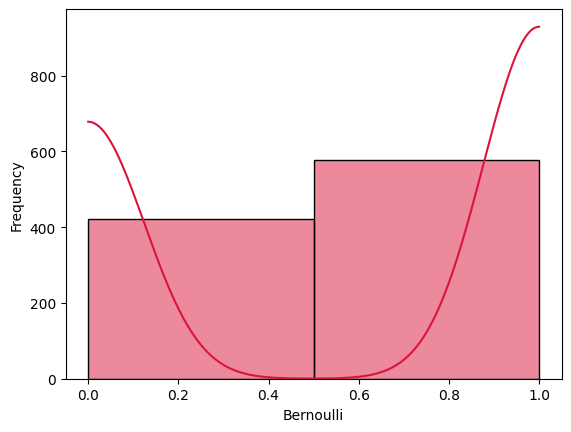

In [7]:
from scipy.stats import bernoulli
import seaborn as sb
import matplotlib.pyplot as plt

data_bern = bernoulli.rvs(size=1000, p=0.6)
ax = sb.histplot(data_bern, kde=True, color='crimson', bins=2)
ax.set(xlabel='Bernoulli', ylabel='Frequency')
plt.show()

## Binomial Distribution @

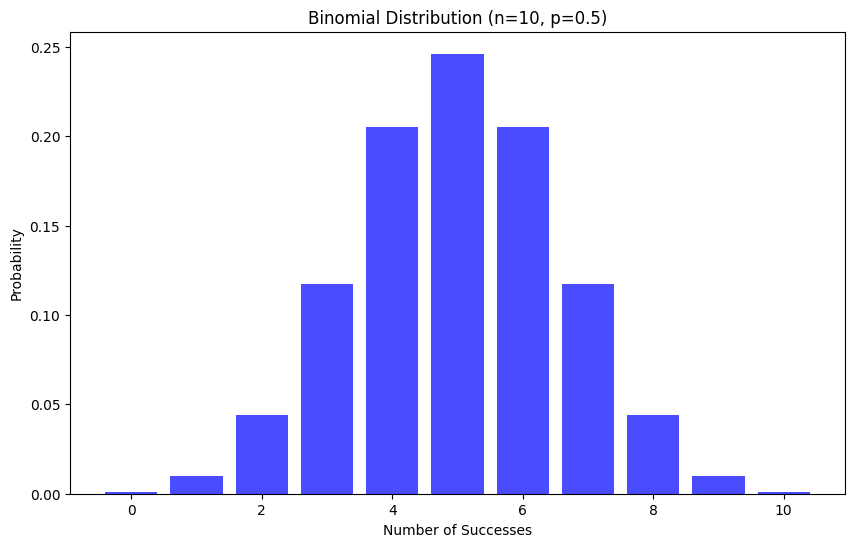

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import binom

# Parameters for the Binomial distribution
n = 10      # Number of trials
p = 0.5     # Probability of success

# Generate a range of possible outcomes
x = np.arange(0, n + 1)

# Calculate the probability mass function for each outcome
binom_pmf = binom.pmf(x, n, p)

# Plot the Binomial distribution
plt.figure(figsize=(10, 6))
plt.bar(x, binom_pmf, color='blue', alpha=0.7)
plt.xlabel('Number of Successes')
plt.ylabel('Probability')
plt.title(f'Binomial Distribution (n={n}, p={p})')
plt.show()

## Poisson's Distribution

**A customer care center receives 5 calls per hour. Compute the probability of attending zero calls, one call, two call, .........  ten calls per hour. Simulate the probability mass function respect to the number of receiving call. Show the probability mass function graphs considering 10 and 15 calls per hour.**

**Answer:**
To compute the probability of attending a specific number of calls per hour at a customer care center, we can use the Poisson distribution. The Poisson distribution is commonly used to model the number of events occurring in a fixed interval of time or space, given the average rate of occurrence.

Let's calculate the probabilities using the Poisson distribution formula:  <br>

$P(x; λ) = (e^(-λ) * λ^x) / x!$  <br>

Where:
P(x; λ) is the probability of x events occurring,  <br>
λ is the average rate of events occurring per unit of time,  <br>
e is the base of the natural logarithm (approximately 2.71828),  <br>
x is the number of events occurring.  <br>
Using this formula, we can calculate the probabilities as follows:  <br>

Given λ = 5 calls per hour:

P(0; 5) = (e^(-5) * 5^0) / 0! = e^(-5) ≈ 0.0067 <br>
P(1; 5) = (e^(-5) * 5^1) / 1! = 5 * e^(-5) ≈ 0.0337 <br>
P(2; 5) = (e^(-5) * 5^2) / 2! = 25 * e^(-5) / 2 ≈ 0.0842 <br>
P(3; 5) ≈ 0.1403 <br>
P(4; 5) ≈ 0.1754 <br>
P(5; 5) ≈ 0.1754 <br>
P(6; 5) ≈ 0.1462 <br>
P(7; 5) ≈ 0.1044 <br>
P(8; 5) ≈ 0.0653 <br>
P(9; 5) ≈ 0.0363 <br>
P(10; 5) ≈ 0.0181 <br>

Number of Calls (x)   |   Probability (P(x; λ=5))   |   Probability (P(x; λ=10))   |   Probability (P(x; λ=15))
---------------------------------------------------------------------------------------------------------------
0                     |   6.7379e-03                    |   4.5400e-05                    |   3.0590e-07
1                     |   3.3690e-02                    |   4.5400e-04                    |   4.5885e-06
2                     |   8.4224e-02                    |   2.2700e-03                    |   3.4414e-05
3                     |   1.4037e-01                    |   7.5667e-03                    |   1.7207e-04
4                     |   1.7547e-01                    |   1.8917e-02                    |   6.4526e-04
5                     |   1.7547e-01                    |   3.7833e-02                    |   1.9358e-03
6                     |   1.4622e-01                    |   6.3055e-02                    |   4.8395e-03
7                     |   1.0444e-01     

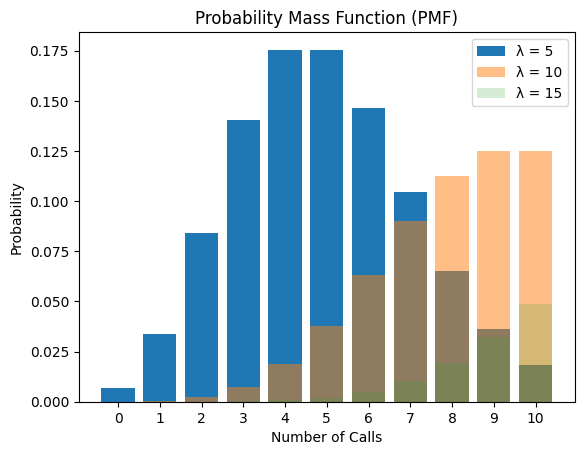

In [9]:
import math
import matplotlib.pyplot as plt
import numpy as np

def poisson_pmf(x, lambd):
    return (math.exp(-lambd) * (lambd**x)) / math.factorial(x)

# Parameters
calls_per_hour_5 = 5  # Average rate of 5 calls per hour
calls_per_hour_10 = 10  # Average rate of 10 calls per hour
calls_per_hour_15 = 15  # Average rate of 15 calls per hour

max_calls = 10  # Maximum number of calls

# Calculate probabilities
x = np.arange(max_calls + 1)
pmf_5 = [poisson_pmf(i, calls_per_hour_5) for i in x]
pmf_10 = [poisson_pmf(i, calls_per_hour_10) for i in x]
pmf_15 = [poisson_pmf(i, calls_per_hour_15) for i in x]


# Calculate and print probabilities
print("Number of Calls (x)   |   Probability (P(x; λ=5))   |   Probability (P(x; λ=10))   |   Probability (P(x; λ=15))")
print("---------------------------------------------------------------------------------------------------------------")
for i in range(len(x)):
    print(f"{x[i]:<21} |   {pmf_5[i]:<30.4e}|   {pmf_10[i]:<30.4e}|   {pmf_15[i]:<.4e}")
print("---------------------------------------------------------------------------------------------------------------")

# Plotting the PMF graph
plt.bar(x, pmf_5, label='λ = 5')
plt.bar(x, pmf_10, label='λ = 10', alpha=0.5)
plt.bar(x, pmf_15, label='λ = 15', alpha=0.2)
plt.xlabel('Number of Calls')
plt.ylabel('Probability')
plt.title('Probability Mass Function (PMF)')
plt.xticks(x)
plt.legend()
plt.show()


## Normal Distribution

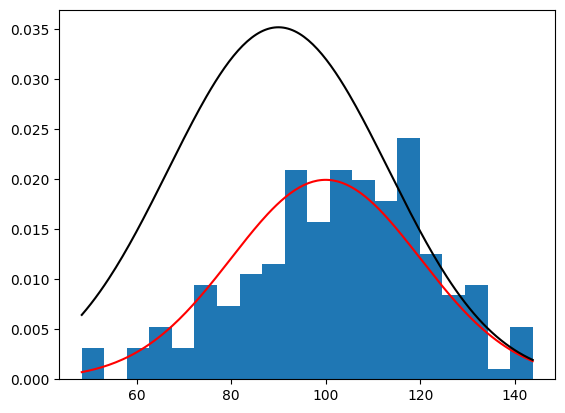

In [10]:
import math
import numpy as np
import matplotlib.pyplot as plt


def normal_random_number(mean, deviation):
    return mean + deviation * np.random.randn()


rnn = []
mean = 100
standard_deviation = 20

for i in range(200):
    x = normal_random_number(mean, standard_deviation)
    rnn.append(x)

plt.hist(rnn, bins=20, density=True)

x = np.linspace(min(rnn), max(rnn), 200)
unimodal_curve = (1 / (standard_deviation * np.sqrt(2 * np.pi))) * np.exp(
    -((x - mean) ** 2) / (2 * standard_deviation ** 2))

# Plot the multimodal density curves
mean2 = 80
standard_deviation2 = 20
multimodal_curve = (1 / (standard_deviation * np.sqrt(2 * np.pi))) * np.exp(
    -((x - mean) ** 2) / (2 * standard_deviation ** 2)) + (1 / (standard_deviation2 * np.sqrt(2 * np.pi))) * np.exp(
    -((x - mean2) ** 2) / (2 * standard_deviation2 ** 2))

plt.plot(x, unimodal_curve, label='Unimodal', color='red')
plt.plot(x, multimodal_curve, label='Multimodal', color='black')
plt.show()


## Unimodal Multimodal Density Curves of Normal Distribution

To Show unimodal and multimodal density curves of normal distribution To generate random sample with sample size 200, which follows a normal distribution with mean 100 and standard deviation 20. The distribution of diastolic blood pressure for men is normally distributed with a mean of about 80 and a standard deviation of 20. A histogram of the distribution of blood pressures for all mean displays a normal distribution with bell shape 

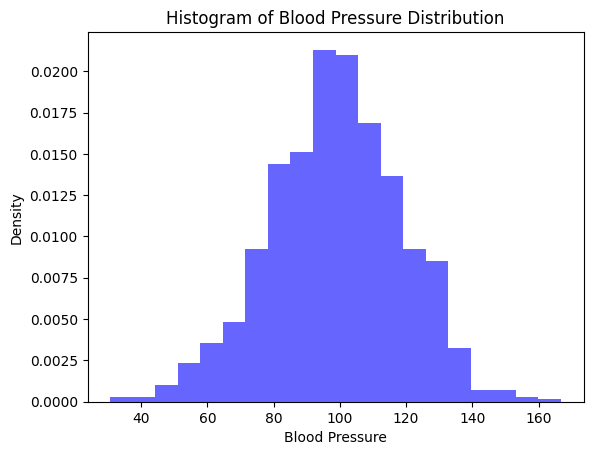

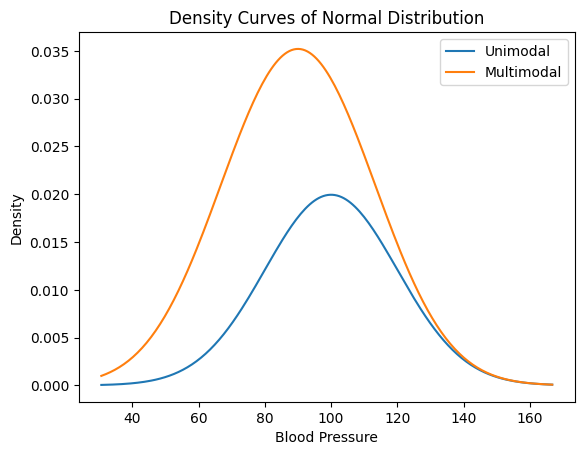

In [1]:
import numpy as np
import matplotlib.pyplot as plt

# Generate a random sample from a normal distribution

sample_size = 1000
mean = 100
standard_deviation = 20

random_sample = np.random.normal(mean, standard_deviation, sample_size)

# Plot the histogram of the blood pressure distribution

plt.hist(random_sample, bins=20, density=True, alpha=0.6, color='blue')
plt.xlabel('Blood Pressure')
plt.ylabel('Density')
plt.title('Histogram of Blood Pressure Distribution')
plt.show()

# Plot the unimodal density curves

x = np.linspace(min(random_sample), max(random_sample), 200)
unimodal_curve = (1 / (standard_deviation * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * standard_deviation ** 2))

# Plot the multimodal density curves
mean2 = 80
standard_deviation2 = 20
multimodal_curve = (1 / (standard_deviation * np.sqrt(2 * np.pi))) * np.exp(-((x - mean) ** 2) / (2 * standard_deviation ** 2)) + (1 / (standard_deviation2 * np.sqrt(2 * np.pi))) * np.exp(-((x - mean2) ** 2) / (2 * standard_deviation2 ** 2))

plt.plot(x, unimodal_curve, label='Unimodal')
plt.plot(x, multimodal_curve, label='Multimodal')
plt.xlabel('Blood Pressure')
plt.ylabel('Density')
plt.title('Density Curves of Normal Distribution')
plt.legend()
plt.show()


## Exponential Distribution

**There were few waves in COVID-19 pandemic. Let a wave occurs every 100 days in Bangladesh, on average. After a wave occurs, find the probability using Exponential distribution that it will take more than 120 days for the next wave to occur. Simulate several Exponential distribution using rate parameters 0.5, 1.0, 2.0, and 4.0**

**Answer:**
To find the probability that it will take more than 120 days for the next wave of COVID-19 pandemic to occur in Bangladesh, we can use the Exponential distribution. The Exponential distribution models the time between consecutive events in a Poisson process, where events occur at a constant rate over time.

Given that a wave occurs every 100 days, the rate parameter (λ) of the Exponential distribution is 1/100 (since the average time between events is 100 days).

To find the probability that it will take more than 120 days for the next wave to occur, we need to calculate the complementary probability of the event "next wave occurs within 120 days." The complementary probability is equal to 1 minus the probability of the event happening within 120 days.

The formula for the complementary probability of the Exponential distribution is:

$P(X \to x) = 1 - e^{-λx}$

where X is the random variable representing the time until the next wave occurs, and x is the time (in this case, 120 days).

Now, let's simulate several Exponential distributions using different rate parameters: 0.5, 1.0, 2.0, and 4.0.


In [11]:
import numpy as np

def exponential_probability(rate_parameter, time):
    lambda_ = 1 / rate_parameter
    return 1 - np.exp(-lambda_ * time)

# Given rate parameter (average time between waves)
average_time_between_waves = 100

# Given time (in this case, 120 days)
time_for_next_wave = 120

# Calculate the probability for the given time using the Exponential distribution
probability = exponential_probability(average_time_between_waves, time_for_next_wave)

print(f"The probability that it will take more than 120 days for the next wave to occur is: {probability:.4f}")

# Simulate Exponential distributions with different rate parameters
rate_parameters = [0.5, 1.0, 2.0, 4.0]
for rate_parameter in rate_parameters:
    samples = np.random.exponential(scale=1/rate_parameter, size=1000)
    mean_time = np.mean(samples)
    print(f"Simulated mean time between waves (rate parameter = {rate_parameter}): {mean_time:.2f} days")


The probability that it will take more than 120 days for the next wave to occur is: 0.6988
Simulated mean time between waves (rate parameter = 0.5): 1.99 days
Simulated mean time between waves (rate parameter = 1.0): 1.00 days
Simulated mean time between waves (rate parameter = 2.0): 0.47 days
Simulated mean time between waves (rate parameter = 4.0): 0.25 days


## Linear Congruential Generator

Generated random numbers: [5, 4, 1, 6, 0, 3, 5, 4, 1, 6]


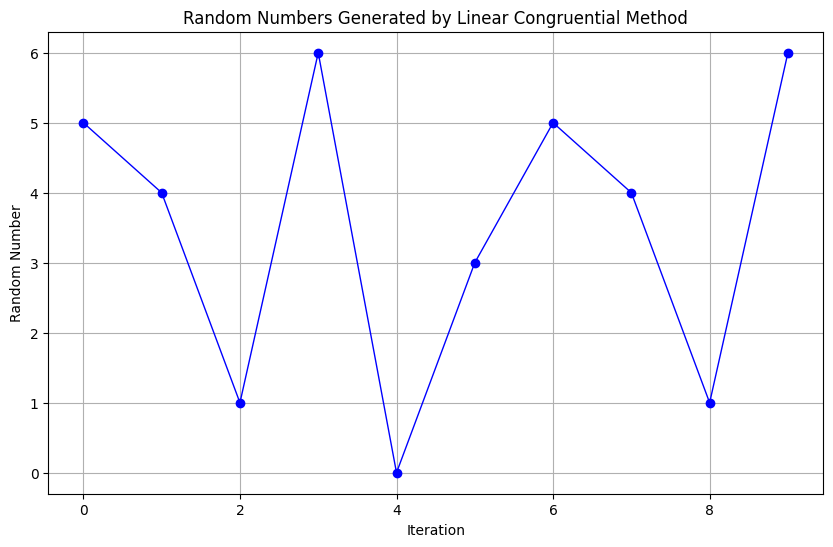

In [12]:
import matplotlib.pyplot as plt

# Function to generate random numbers
def linearCongruentialMethod(Xo, m, a, c, randomNums, noOfRandomNums):
    # Initialize the seed state
    randomNums[0] = Xo

    # Generate the required numbers of random numbers
    for i in range(1, noOfRandomNums):
        # Follow the linear congruential method
        randomNums[i] = ((randomNums[i - 1] * a) + c) % m

# Driver Code
if __name__ == '__main__':
    # Seed value
    Xo = 5
    
    # Modulus parameter
    m = 7
    
    # Multiplier term
    a = 3
    
    # Increment term
    c = 3

    # Number of random numbers to be generated
    noOfRandomNums = 10

    # To store random numbers
    randomNums = [0] * noOfRandomNums

    # Generate random numbers
    linearCongruentialMethod(Xo, m, a, c, randomNums, noOfRandomNums)

    # Print the generated random numbers
    print("Generated random numbers:", randomNums)

    # Plot the generated random numbers
    plt.figure(figsize=(10, 6))
    plt.plot(randomNums, marker='o', color='blue', linestyle='-', linewidth=1, markersize=6)
    plt.title("Random Numbers Generated by Linear Congruential Method")
    plt.xlabel("Iteration")
    plt.ylabel("Random Number")
    plt.grid(True)
    plt.show()

## Inverse Transformation

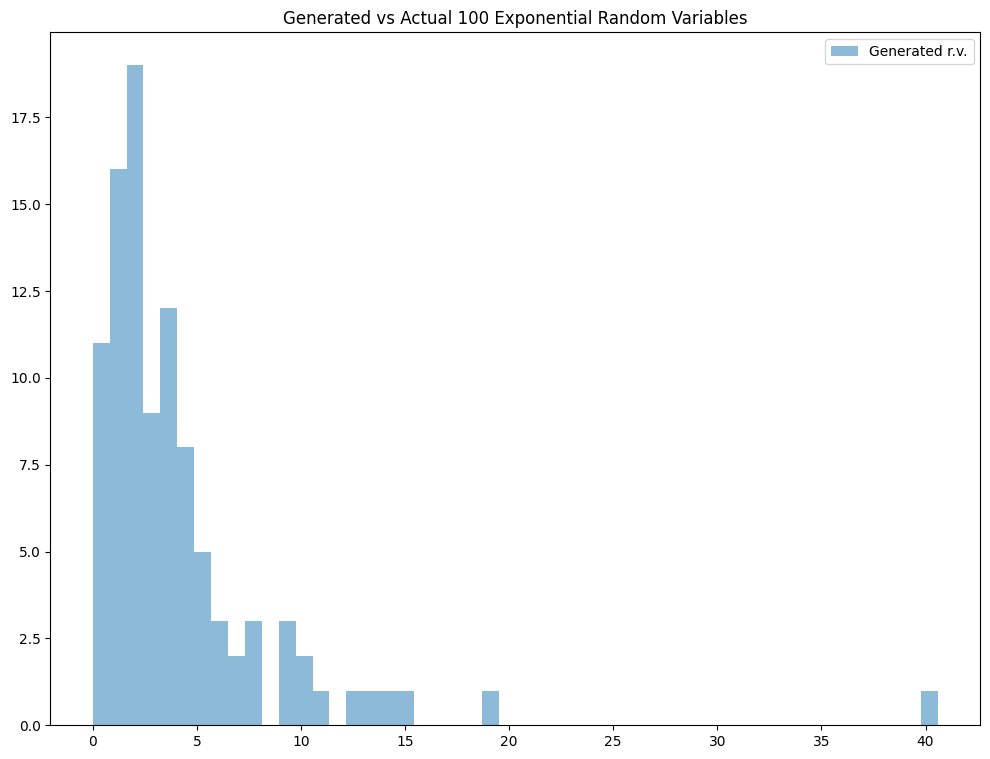

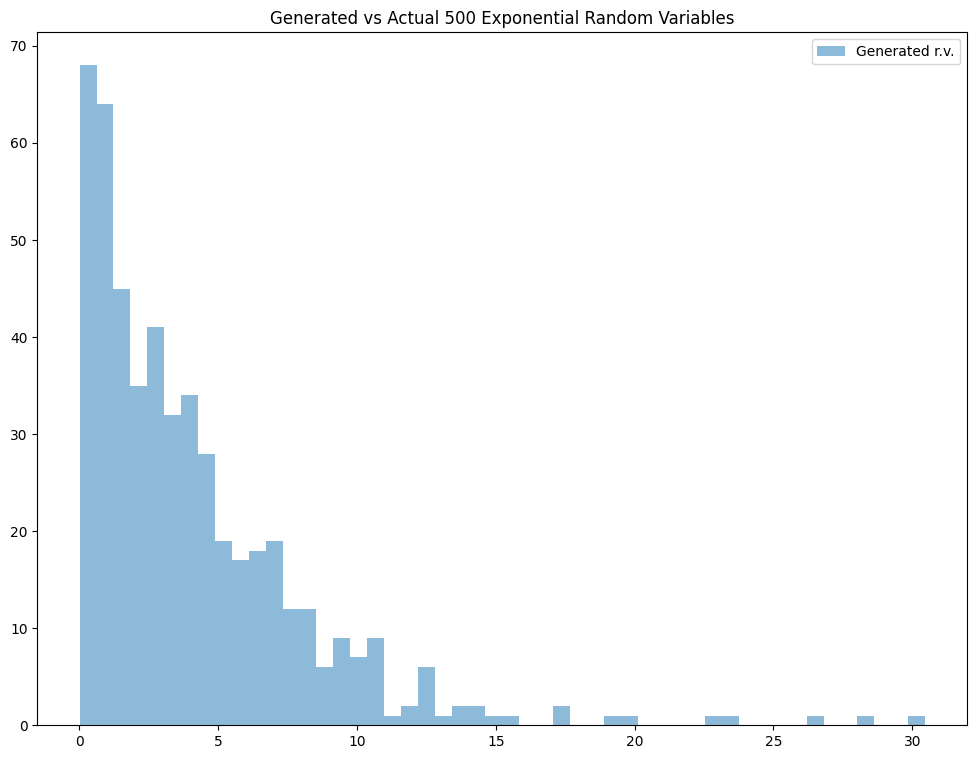

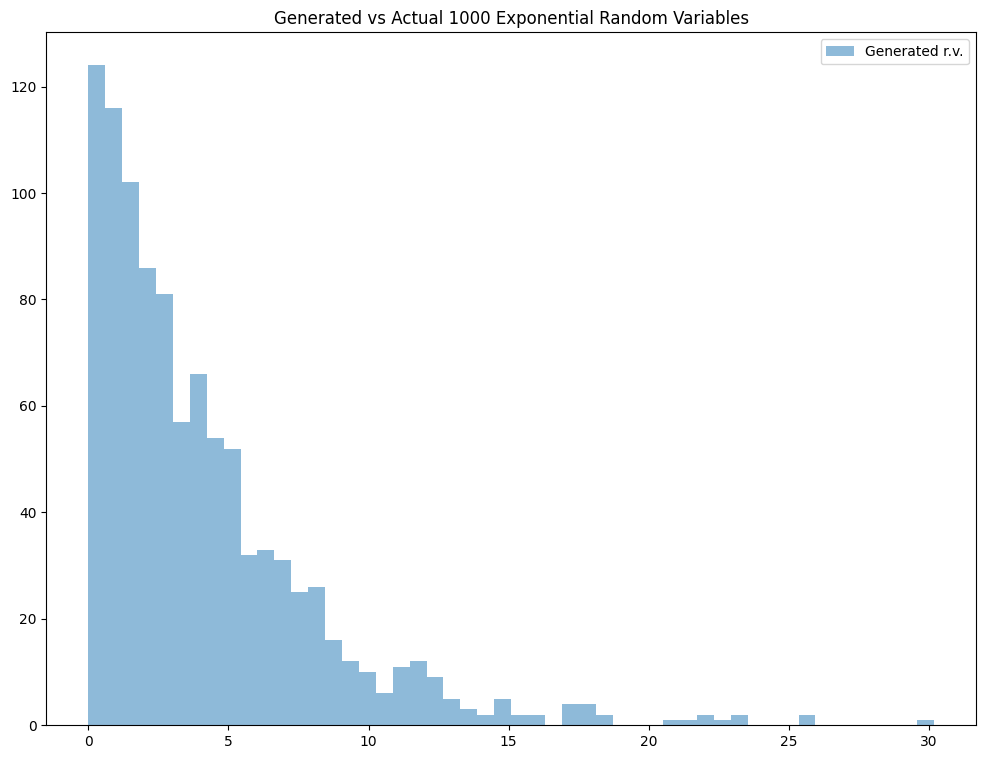

In [13]:
import numpy as np
from matplotlib import pyplot as plt


def exponential_inverse_trans(n=1, mean=1):
    U = np.random.rand(n)
    X = -mean * np.log(1 - U)
    actual = np.random.exponential(scale=mean, size=n)

    plt.figure(figsize=(12, 9))
    plt.hist(X, bins=50, alpha=0.5, label="Generated r.v.")
    plt.title("Generated vs Actual %i Exponential Random Variables" % n)
    plt.legend()
    plt.show()
    return X


cont_example1 = exponential_inverse_trans(n=100, mean=4)
cont_example2 = exponential_inverse_trans(n=500, mean=4)
cont_example3 = exponential_inverse_trans(n=1000, mean=4)